# Exploratory Data Analysis (EDA): Diagnosing Sales Patterns and Anomalies

## Monthly Sales Growth Analysis: Unveiling the Momentum

## What is the percentage growth in total monthly sales over time, and how does it vary across different months?

### 1. Overview

This analysis investigates the monthly progression of total sales, focusing on identifying trends, fluctuations, and growth patterns
across time. By calculating the percentage growth rate of sales month-over-month, we gain insights into how well the business is scaling
and where seasonal or operational factors may be influencing performance. A dual-axis visualization enhances interpretability by 
combining total sales (bar chart) with monthly growth rates (line chart) to tell a cohesive story of revenue dynamics.

### 2. Goal

- Evaluate how total sales evolve across different months.
- Quantify monthly sales performance through growth rates.
- Identify high-growth and low-growth periods to spot seasonal or strategic impacts.
- Provide visual insights that support better decision-making and business forecasting.

### 3. Business Challenge

- Inconsistent sales performance: Management lacks clarity on why some months underperform while others spike.
- Uncertainty in strategy execution: It’s unclear whether recent sales strategies are yielding consistent month-over-month improvements.
- Limited visibility into growth dynamics: Without quantifying growth, it’s hard to identify whether revenue growth is sustainable
  or driven by short-term factors.

### 4. Analysis Approach

- Clean and aggregate data to ensure accurate insights and avoid distorted growth metrics.
- Perform diagnostic analysis on total monthly sales using historical data.
- Compute and visualize month-over-month growth rates to identify patterns and anomalies.
- Create a dual-axis plot to present both sales volume and growth trajectory in a single, intuitive visualization.
- Translate findings into strategic recommendations, highlighting months with explosive or declining growth for targeted business actions.

## Importing libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

##  Loading the clean dataframe (post-ETL process)

In [11]:
df = pd.read_csv("C:\\Monthly_Sales\\cleaned_data.csv")

In [12]:
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Year,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,2024,Mon,5,Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,2024,Mon,5,Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,2024,Mon,5,San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,2024,Mon,5,Portland (OR),600.00
4,156535,Lightning Charging Cable,2,14.95,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,2024,Mon,5,Los Angeles (CA),29.90


## Monthly Total Sales (USD) and Growth Rate (%)

In [14]:
# Deep copy to avoid modifying the original DataFrame (df)
df_growth = df.copy(deep=True)

# Defining the Proper Month Order for Chronological Sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Grouping by Month Name and Calculating Total Sales
df_monthly_growth_rate = df_growth.groupby('Month Name')['Total Sales'].sum().reset_index()

# Re-ordering months chronologically
df_monthly_growth_rate['Month Name'] = pd.Categorical(df_monthly_growth_rate['Month Name'], 
                                                      categories=month_order, 
                                                      ordered=True)
df_monthly_growth_rate = df_monthly_growth_rate.sort_values('Month Name').reset_index(drop=True)

# Calculating Monthly Growth Rate (%)
df_monthly_growth_rate['Growth Rate (%)'] = df_monthly_growth_rate['Total Sales'].pct_change() * 100

df_monthly_growth_rate

,Month Name,Total Sales,Growth Rate (%)
0,January,4643726.50,NaN
1,February,1235808.22,-73.387575
2,March,2360571.99,91.014427
3,April,2621378.14,11.048430
4,May,2658910.61,1.431784
5,June,3409702.73,28.236832
6,July,2990650.83,-12.289983
7,August,3144247.72,5.135902
8,September,2371339.60,-24.581655
9,October,1760284.20,-25.768363


## Plotting Monthly Total Sales (USD) and Growth Rate (%)

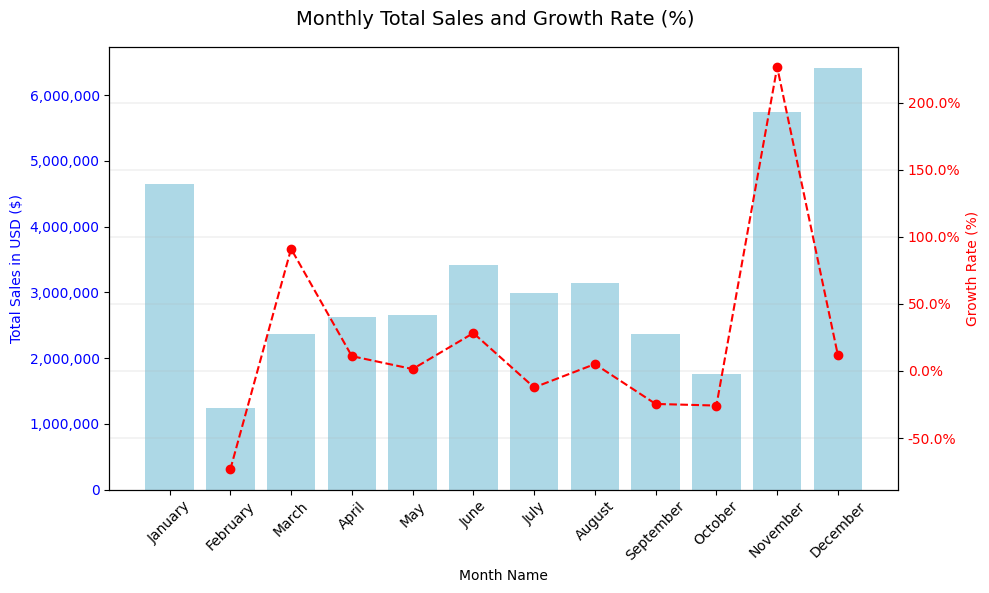

In [16]:
# Monthly Sales Growth Plot
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis: Total Sales as bar chart
ax1.bar(df_monthly_growth_rate['Month Name'].astype(str), df_monthly_growth_rate['Total Sales'], color='lightblue', label='Total Sales')
ax1.set_xlabel('Month Name')
ax1.set_ylabel('Total Sales in USD ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Numeric and not scientific
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Right y-axis: Growth Rate as line plot
ax2 = ax1.twinx()
ax2.plot(df_monthly_growth_rate['Month Name'].astype(str), df_monthly_growth_rate['Growth Rate (%)'], color='red', linestyle='--', marker='o', label='Growth Rate (%)')
ax2.set_ylabel('Growth Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.1f}%'))

fig.suptitle('Monthly Total Sales and Growth Rate (%)', fontsize=14)
fig.tight_layout()
plt.grid(True, linewidth=0.2)

plt.savefig(r"C:/Users/DELL/OneDrive - COVENANT UNIVERSITY/Desktop/1. Retail Sales Analysis and Insights/2. Monthly Sales Growth Analysis.png", dpi=300, bbox_inches='tight')

plt.show()

## Key Insights

1. High Volatility in Monthly Sales: The growth rates fluctuate significantly, with both steep declines (e.g., -73.39% in February, -25.77% in October) and sharp increases (e.g., +226.47% in November, +91.01% in March).

2. Exceptional Growth in November: The highest sales growth occurred in Month November (+226.47%), likely due to a seasonal or promotional event. This also marks the peak in total sales ($5.75M).

3. Absolute peak occurred in December ($6.41M) with sales growth of +11.58%.

4. Sustained Growth Toward Year-End: Despite mid-year dips (July to October), November and December show strong recovery and surpass all previous months in both growth and absolute sales.

5. Underperformance Early in the Year: February experienced a dramatic -73.39% drop from January, suggesting either a data anomaly or external factor disrupting sales continuity.

## Strategic Recommendations

1. Investigate Sales Drop Causes: Analyze February , September, and October to determine the reasons behind sharp declines. This can uncover operational inefficiencies, seasonal patterns, or external disruptions that can be mitigated in future planning.

2. Capitalize on Peak Months (November & December): Strengthen promotional activities around these high-performing months. Consider expanding festive campaigns or bundling offers to extend the momentum.

3. Stabilize Mid-Year Growth: Develop a mid-year marketing boost strategy (May–September) using loyalty incentives, product refreshes, or geo-targeted ads to maintain momentum.

4. Build Forecast Models: Use this growth trend as input for predictive models to anticipate low-performing months and proactively plan inventory, staffing, and promotional efforts.

5. Apply Data-Driven Planning: Set monthly sales targets using historical growth data. Tailor resource allocation and budgeting based on expected performance to reduce surprises.